# 1. Introduction

# 2.  Objectifs

# 3.  Analyse des données

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.decomposition import NMF
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [14]:
twenty_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

## 3.1 All dataset

In [15]:
print('\n Nombre de données de tout les 20newsgroups :', len(twenty_test.data))


 Nombre de données de tout les 20newsgroups : 7532


## 3.2. Test dataset 

In [6]:
print('\n Nombre de données dans le donnée de test :', len(twenty_test.data))



 Nombre de données dans les données de test : 7532



Visualisation des fréquences de chaque catégorie



<AxesSubplot:title={'center':'La fréquence de chaque catégorie'}, xlabel='Catégorie', ylabel='Fréquence'>

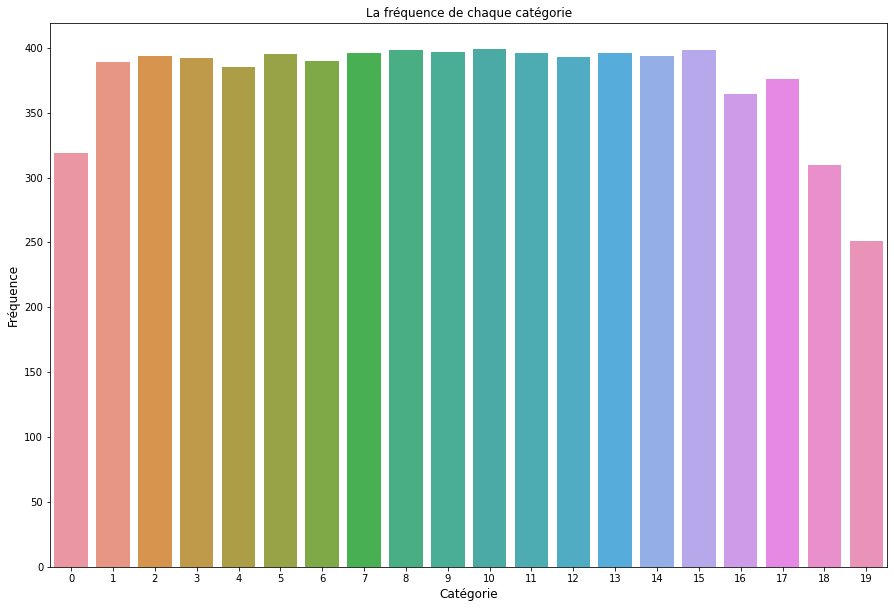

In [11]:
categories_test = twenty_test.target_names
target_test, freq_test = np.unique(twenty_test.target, return_counts=True)

print("\nVisualisation des fréquences de chaque catégorie du test dataset\n")
plt.figure(figsize=(15,10))
plt.title('La fréquence de chaque catégorie du test dataset')
plt.ylabel('Fréquence', fontsize=12)
plt.xlabel('Catégorie', fontsize=12)
sns.barplot(x=target_test, y=freq_test)

## 3.3 Train dataset

In [13]:
print('\n Nombre de données dans le donnée d\'apprentissage :', len(twenty_train.data))


 Nombre de données dans le donnée d'apprentissage : 11314



Visualisation des fréquences de chaque catégorie du train dataset



<AxesSubplot:title={'center':'La fréquence de chaque catégorie du train dataset'}, xlabel='Catégorie', ylabel='Fréquence'>

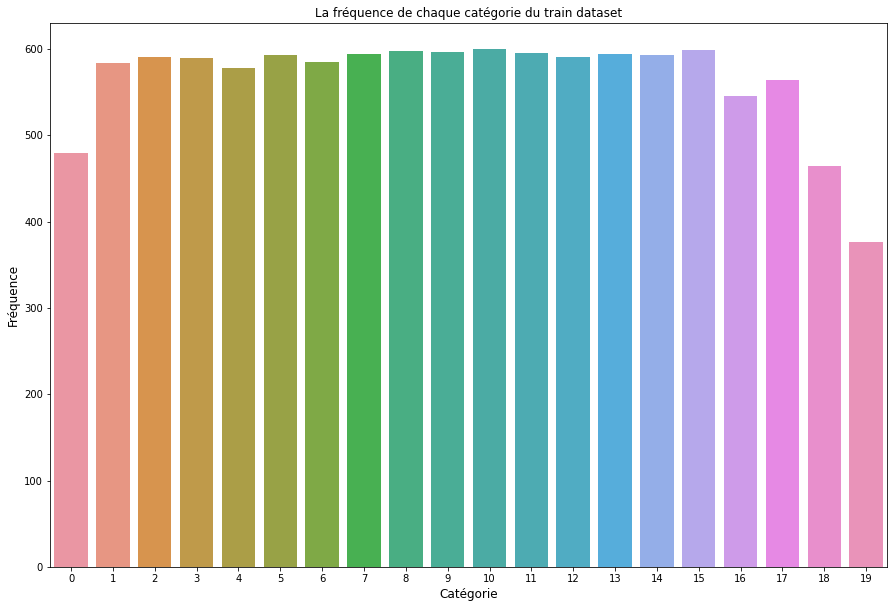

In [12]:
categories = twenty_train.target_names
target, freq = np.unique(twenty_train.target, return_counts=True)

print("\nVisualisation des fréquences de chaque catégorie du train dataset\n")
plt.figure(figsize=(15,10))
plt.title('La fréquence de chaque catégorie du train dataset')
plt.ylabel('Fréquence', fontsize=12)
plt.xlabel('Catégorie', fontsize=12)
sns.barplot(x=target, y=freq)

# 4. Traitement et transformation des textes

## 4.1 Bag of word

In [56]:
def bagOfWord(count_vect, data, isFit):

    if isFit :
        occurence = count_vect.fit_transform(data)
    else :
        occurence = count_vect.transform(data)
        
    return occurence, count_vect

In [57]:
count_vect = CountVectorizer(stop_words='english')

X_train_counts, count_vect= bagOfWord(count_vect, twenty_train.data, True)
X_test_counts, count_vect = bagOfWord(count_vect, twenty_test.data, False)
X_all_counts, count_vect = bagOfWord(count_vect, twenty_all.data, False)

## 4.2 TF-IDF ou "Terme Frequency" et "Inverse Document Frequency"

In [58]:
tfidf_transformer = TfidfTransformer()

train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
test_tfidf = tfidf_transformer.transform(X_test_counts)
all_tfidf = tfidf_transformer.transform(X_all_counts)

# 5. Machine learning 

## 5.1 K Nearest Neighbors (KNN)

In [61]:
knn_data_class = KNeighborsClassifier(weights='distance').fit(train_tfidf, twenty_train.target)
knn_data_pred = knn_data_class.predict(test_tfidf)
knn_accur_core = accuracy_score(twenty_test.target,knn_data_pred)
print('\n Score de précision de KNN ', knn_accur_core)

Score de précision de KNN  0.6943706850770048


### 5.1.1 Matrice de confusion

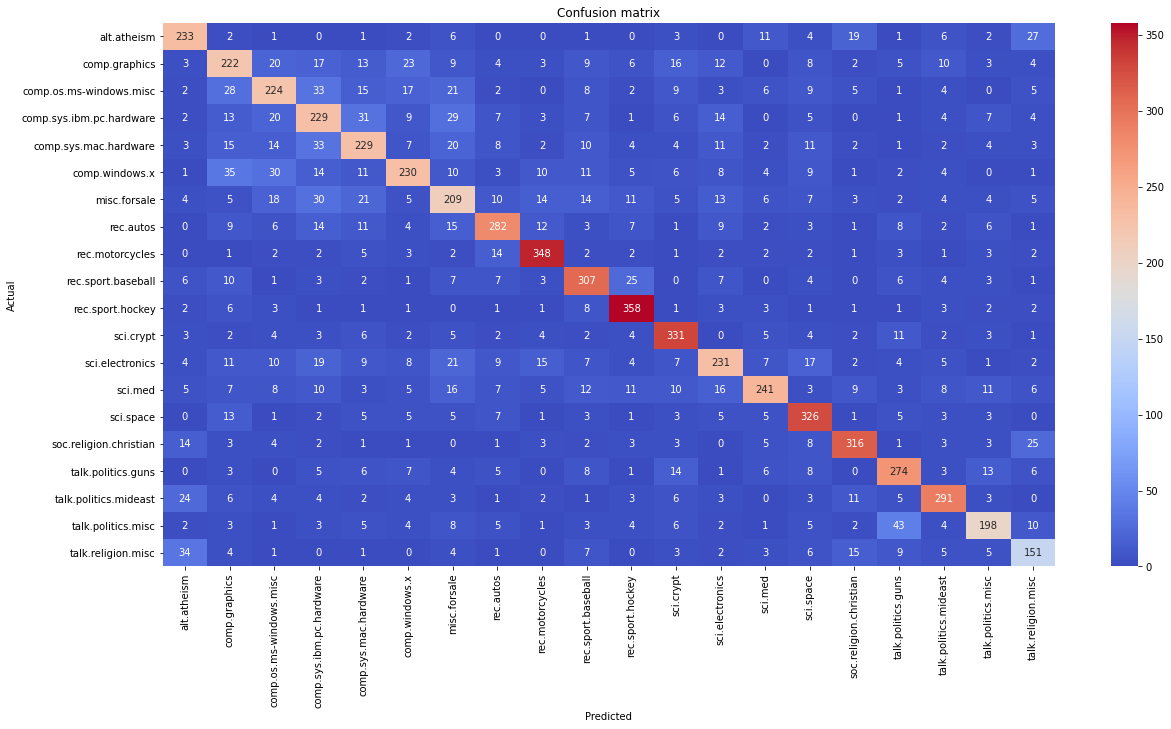

In [80]:
knn_conf_mat = confusion_matrix(twenty_test.target, knn_data_pred)
labels=twenty_all.target_names

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(knn_conf_mat, annot=True, cmap = "coolwarm", robust =False, fmt ="d",xticklabels=labels, yticklabels=labels)

plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 5.1.2 Décomposition avec NMF

/home/hrandrianasolo/Etude/Master/Master 1/S2/Fouilles-données/text-classification/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


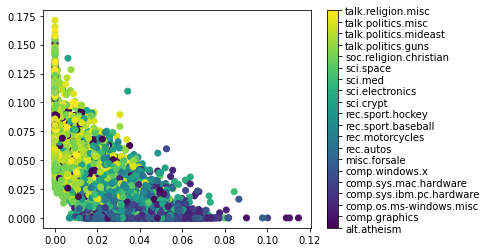

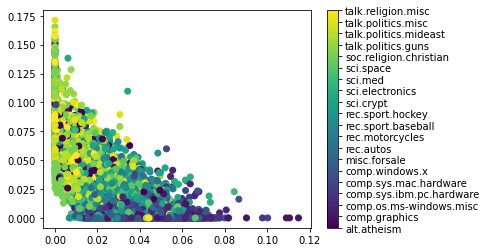

In [82]:
nmf = NMF(n_components=2)
NMF = nmf.fit_transform(test_tfidf)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c=twenty_test.target)
formatter = plt.FuncFormatter(lambda i, args : twenty_test.target_names[int(i)])
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],format=formatter)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c=knn_data_pred)
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],format=formatter)

## 5.2  Stochastic Gradient Descent Classifier (SGD)

In [85]:
sgd_data_class = linear_model.SGDClassifier(max_iter=1000, tol=1e-3).fit(train_tfidf, twenty_train.target)
sgd_data_pred = sgd_data_class.predict(test_tfidf)
sgd_accur_core = accuracy_score(twenty_test.target,sgd_data_pred)
print('\n Score de précision de SGD ', sgd_accur_core)


 Score de précision de SGD  0.8501062134891131


### 5.2.1 Matrice de confusion

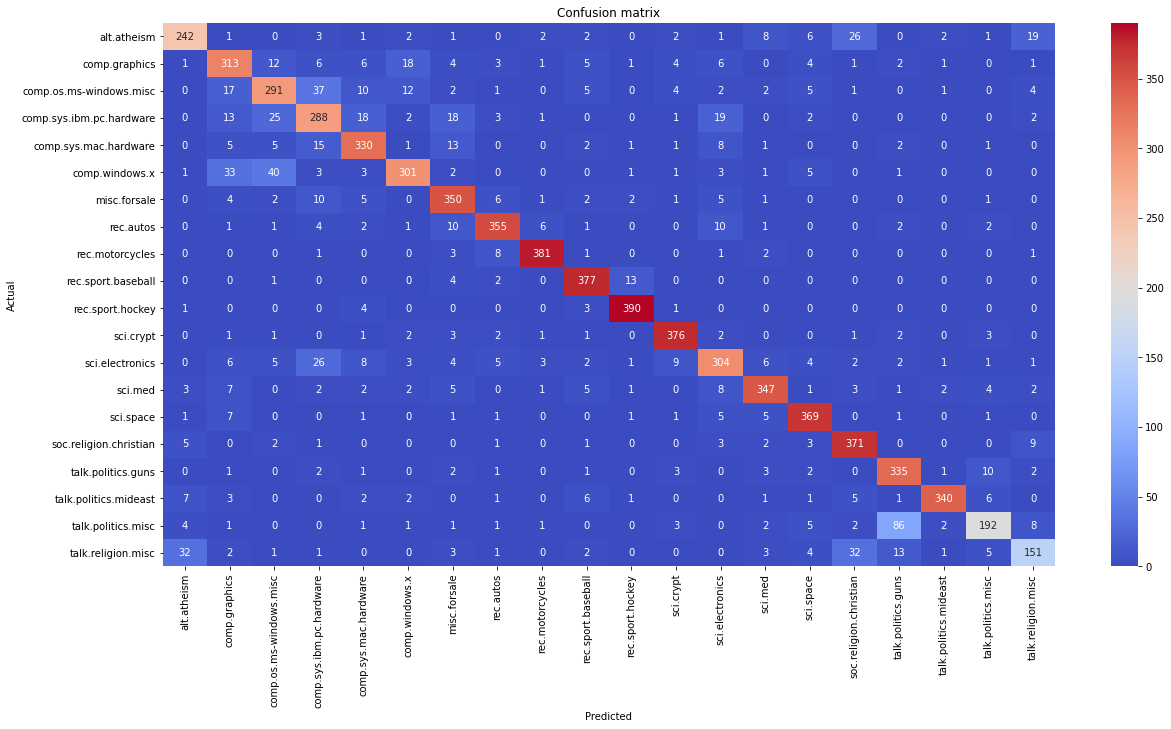

In [87]:
sgd_conf_mat = confusion_matrix(twenty_test.target, sgd_data_pred)
labels=twenty_all.target_names

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(sgd_conf_mat, annot=True, cmap = "coolwarm", robust =False, fmt ="d",xticklabels=labels, yticklabels=labels)

plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 5.2.2 Décomposition avec NMF

/home/hrandrianasolo/Etude/Master/Master 1/S2/Fouilles-données/text-classification/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


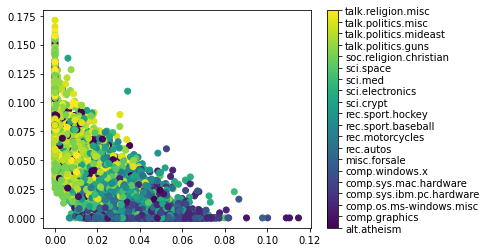

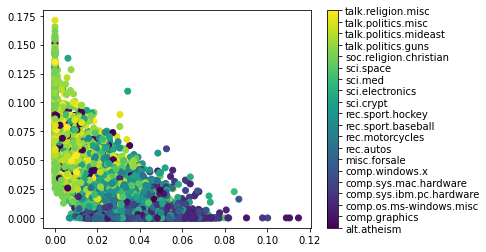

In [93]:
NMF = nmf.fit_transform(test_tfidf)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c=twenty_test.target)
formatter = plt.FuncFormatter(lambda i, args : twenty_test.target_names[int(i)])
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],format=formatter)
plt.figure()
plt.scatter(NMF[:,0],NMF[:,1],c=sgd_data_pred)
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],format=formatter)

## 5.3 Comparaison

# 6. Conclusion